______________________________________________________________________________________________________________________________________
3. Machine Learning Models
Classification Task:
   - Apply at least three different classification algorithms (e.g., Logistic Regression, Decision Trees, Random Forest) to the `weather_classification_data.csv` dataset with the reason why you choose those models.
   - Train the models on the training set and evaluate their performance on the test set using appropriate evaluation metrics.
______________________________________________________________________________________________________________________________________


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Hypothetical file path
weather_file_path = r'Data\weather_classification_data.csv'

# Load the dataset
weather_df=pd.read_csv(weather_file_path)

# Display the first few rows of the dataset
print("--------Weather Classfication data--------")
print(weather_df.head())

--------Weather Classfication data--------
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Su

In [3]:

def Drop_Missing_value(weather_df):
    weather_df = weather_df.dropna()
    return  weather_df

weather_df = Drop_Missing_value( weather_df)
weather_df=pd.get_dummies(weather_df,columns=['Cloud Cover'])
weather_df=pd.get_dummies(weather_df,columns=['Season'])
weather_df=pd.get_dummies(weather_df,columns=['Location'])
# weather_df=pd.get_dummies(weather_df,columns=['Weather Type'])
print(weather_df.head())
num_rows_weather = weather_df.shape[0]
print(f"Number of rows in weather_df: {num_rows_weather}")

   Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
1         39.0        96         8.5               71.0               1011.43   
2         30.0        64         7.0               16.0               1018.72   
3         38.0        83         1.5               82.0               1026.25   
4         27.0        74        17.0               66.0                990.67   

   UV Index  Visibility (km) Weather Type  Cloud Cover_clear  \
0         2              3.5        Rainy              False   
1         7             10.0       Cloudy              False   
2         5              5.5        Sunny               True   
3         7              1.0        Sunny               True   
4         1              2.5        Rainy              False   

   Cloud Cover_cloudy  Cloud Cover_overcast  Cloud Cover_partly cloudy  \
0               False                 False           

In [4]:
X=weather_df.drop('Weather Type' ,axis=1)
Y=weather_df['Weather Type']
Xtrain, Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.2)

print("------Weather Classification data---------\n")
num_rows_train_weather = Xtrain.shape[0]
print(f"Number of rows of Trainig of Weather data: {num_rows_train_weather}")  
num_rows_test_weather = Xtest.shape[0]
print(f"Number of rows of Testing of Weather data: {num_rows_test_weather}") 

------Weather Classification data---------

Number of rows of Trainig of Weather data: 10560
Number of rows of Testing of Weather data: 2640


______________________________________________________________________________________________________________________________________
Logistic Regression Model                 
______________________________________________________________________________________________________________________________________

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=20000)
lr_model.fit(X_train_scaled, Ytrain)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression")
print("Accuracy:", accuracy_score(Ytest, y_pred_lr))
print("Classification Report:\n", classification_report(Ytest, y_pred_lr))



accuracy_log_reg = accuracy_score(Ytest, y_pred_lr)
precision_log_reg = precision_score(Ytest, y_pred_lr, average='weighted')
recall_log_reg = recall_score(Ytest, y_pred_lr, average='weighted')
f1_log_reg = f1_score(Ytest, y_pred_lr, average='weighted')



Logistic Regression
Accuracy: 0.871969696969697
Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.80      0.83      0.82       627
       Rainy       0.86      0.85      0.86       692
       Snowy       0.89      0.92      0.91       654
       Sunny       0.94      0.88      0.91       667

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640



______________________________________________________________________________________________________________________________________
Decision Tree          
______________________________________________________________________________________________________________________________________

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Create a pipeline for decision tree
dt_pipeline = Pipeline(steps=[('classifier', DecisionTreeClassifier(random_state=42))])

# Train the model
dt_pipeline.fit(Xtrain, Ytrain)

# Make predictions
y_pred_dt = dt_pipeline.predict(Xtest)

# Evaluate the model
accuracy_dt = accuracy_score(Ytest, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(Ytest, y_pred_dt))


accuracy_dt = accuracy_score(Ytest, y_pred_dt)
precision_dt = precision_score(Ytest, y_pred_dt, average='weighted')
recall_dt = recall_score(Ytest, y_pred_dt, average='weighted')
f1_dt = f1_score(Ytest, y_pred_dt, average='weighted')


Decision Tree Accuracy: 0.9128787878787878
              precision    recall  f1-score   support

      Cloudy       0.89      0.90      0.89       627
       Rainy       0.91      0.91      0.91       692
       Snowy       0.94      0.93      0.93       654
       Sunny       0.92      0.92      0.92       667

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



______________________________________________________________________________________________________________________________________
Random Forest                
______________________________________________________________________________________________________________________________________

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline for random forest
rf_pipeline = Pipeline(steps=[
                              ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
rf_pipeline.fit(Xtrain, Ytrain)

# Make predictions
y_pred_rf = rf_pipeline.predict(Xtest)

# Evaluate the model
accuracy_rf = accuracy_score(Ytest, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(Ytest, y_pred_rf))


accuracy_rf = accuracy_score(Ytest, y_pred_rf)
precision_rf = precision_score(Ytest, y_pred_rf, average='weighted')
recall_rf = recall_score(Ytest, y_pred_rf, average='weighted')
f1_rf = f1_score(Ytest, y_pred_rf, average='weighted')

Random Forest Accuracy: 0.915530303030303
              precision    recall  f1-score   support

      Cloudy       0.86      0.92      0.89       627
       Rainy       0.91      0.91      0.91       692
       Snowy       0.96      0.92      0.94       654
       Sunny       0.93      0.91      0.92       667

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640



______________________________________________________________________________________________________________________________________
4. Model Evaluation and Comparison
  1 Model Performance Comparison:
   - Compare the performance of different models for classification tasks.
   - Create tables or visualizations to summarize the performance metrics of each model.
   - Discuss which model performed the best for each task and provide possible reasons for its superior performance.
______________________________________________________________________________________________________________________________________

In [27]:
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_log_reg, accuracy_dt, accuracy_rf],
    'Precision': [precision_log_reg, precision_dt, precision_rf],
    'Recall': [recall_log_reg, recall_dt, recall_rf],
    'F1-Score': [f1_log_reg, f1_dt, f1_rf]
})

print(summary_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.871970   0.873528  0.871970  0.872370
1        Decision Tree  0.912879   0.912978  0.912879  0.912918
2        Random Forest  0.915530   0.916797  0.915530  0.915836


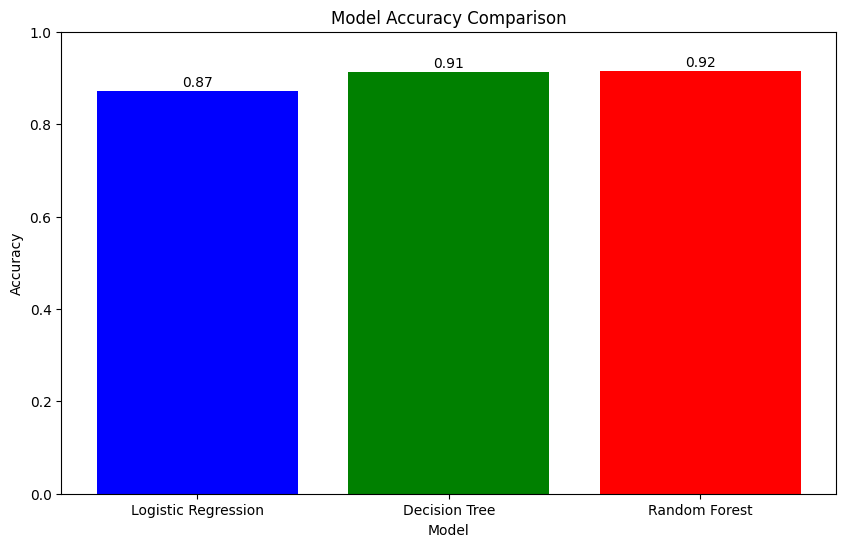

In [30]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.bar(summary_df['Model'], summary_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
for i in range(len(summary_df)):
    plt.text(i, summary_df['Accuracy'][i] + 0.01, f"{summary_df['Accuracy'][i]:.2f}", ha='center')
plt.show()
